In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import ticker

file = "test06.txt"
i=0

In [142]:
f = open(file)
new = f.read().replace("  "," ")
if i==0:
    new = new.replace("~/scream/components/eam/src/physics/cam/testing/IceNuclTest/obj ~/scream/components/eam/src/physics/cam/testing/IceNuclTest\n~/scream/components/eam/src/physics/cam/testing/IceNuclTest\n ","")
    new = new.replace("\n ","\n")
i+=1
f.close()
f = open(file,'w')
f.write(new)
f.close()

In [143]:
df = pd.read_csv(file, header=0, sep=" ", dtype='float32', engine='python')
df.head()

,w,qc,T,Sice,Sliq,Nnuc_old,qnuc_old,nnuc1,nnuc2,nnuc3,nnuc4
0,0.5,0.0,270.0,0.00,-0.3,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,0.0,270.0,0.05,-0.3,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.0,270.0,0.10,-0.3,0.0,0.0,0.0,0.0,0.0,0.0
3,0.5,0.0,270.0,0.15,-0.3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,0.0,270.0,0.20,-0.3,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
df["nnuc"] = df.nnuc1+df.nnuc2+df.nnuc3+df.nnuc4
df.head()

,w,qc,T,Sice,Sliq,Nnuc_old,qnuc_old,nnuc1,nnuc2,nnuc3,nnuc4,nnuc
0,0.5,0.0,270.0,0.00,-0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,0.0,270.0,0.05,-0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.0,270.0,0.10,-0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.5,0.0,270.0,0.15,-0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,0.0,270.0,0.20,-0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0


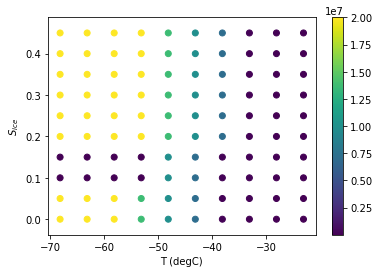

In [145]:
n=40
sc = plt.scatter(df["T"][100*n:100*(n+1)]-273.15, df["Sice"][100*n:100*(n+1)], 
                 c=df.Nnuc_old[100*n:100*(n+1)])
plt.xlabel("T (degC)")
plt.ylabel("$S_{ice}$")
plt.colorbar(sc)
plt.show()

In [146]:
var="nnuc"
var_dict = {}
corr_dict = {}
for j in range(7):
    base = list(df.columns)[j]
    uniq = pd.Series(df[base].unique(),name=base)
    medians = pd.Series(np.zeros((len(uniq))), name=var)
    print("median of {} on {}".format(var,base))
    for i,it in enumerate(uniq):
        medians[i] = np.nanmedian(df[var].where(df[base]==it))
        print(i,it,medians[i])
    var_dict[base] = medians
    corr_dict[base] = uniq.corr(medians)

median of nnuc on w
0 0.5 20000.0
1 2.0 20000.0
median of nnuc on qc
0 0.0 20000.0
1 0.0010000000474974513 20000.0
median of nnuc on T
0 270.0 0.0
1 265.0 0.0
2 260.0 0.0
3 255.0 12451.830078125
4 250.0 56932.578125
5 245.0 260308.5625
6 240.0 1190189.375
7 235.0 20000.0
8 230.0 20000.0
9 225.0 20000.0
10 220.0 20000.0
11 215.0 20000.0
12 210.0 20000.0
13 205.0 20000.0
14 200.0 20000.0
15 195.0 20000.0
16 190.0 20000.0
17 185.0 20000.0
median of nnuc on Sice
0 0.0 0.0
1 0.05000000074505806 0.0
2 0.10000000149011612 20000.0
3 0.15000000596046448 20000.0
4 0.20000000298023224 56932.578125
5 0.25 56932.578125
6 0.30000001192092896 56932.578125
7 0.3499999940395355 56932.578125
8 0.4000000059604645 56932.578125
9 0.44999998807907104 56932.578125
median of nnuc on Sliq
0 -0.30000001192092896 20000.0
1 -0.20000000298023224 20000.0
2 -0.10000000149011612 20000.0
3 0.0 20000.0
4 0.10000000149011612 20000.0
5 0.20000000298023224 20000.0
6 0.30000001192092896 20000.0
7 0.4000000059604645 20000.0

In [147]:
var_dict.keys()

dict_keys(['w', 'qc', 'T', 'Sice', 'Sliq', 'Nnuc_old', 'qnuc_old'])

In [148]:
file, corr_dict

('test06.txt',
 {'w': nan,
  'qc': nan,
  'T': 0.1358735339872915,
  'Sice': 0.8806617086673716,
  'Sliq': nan,
  'Nnuc_old': 0.49110542724448036,
  'qnuc_old': 0.49109421097613093})

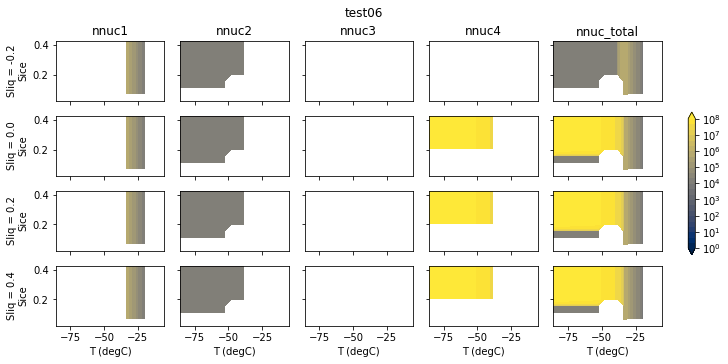

In [149]:
# 2d histogram
var="Sliq"
svals = np.arange(-0.2,0.5,0.2)
fig, ax = plt.subplots(len(svals),5,figsize=(10,5), 
                       sharex=True, sharey=True, constrained_layout=True)
imax = [1e7]*5

for j in range(len(svals)):
    mask = np.where((df[var]<svals[j]+0.05)&(df[var]>=svals[j]-0.05),True, False)
    for i in range(5):
        x = df["T"].values[mask]
        y = df["Sice"].values[mask]
        if i<4:
            z = df["nnuc"+str(i+1)].values[mask]
            meds, xedges, yedges, _ = stats.binned_statistic_2d(x,y,z, 
                                      statistic="mean", bins=[18,10])
            title = "nnuc"+str(i+1)
        
        else:
            z = df["nnuc"].values[mask]
            meds, xedges, yedges, _ = stats.binned_statistic_2d(x,y,z, 
                                      statistic="mean", bins=[18,10])
            title = "nnuc_total"
        xbins=(xedges[1:]+xedges[:-1])/2
        ybins=(yedges[1:]+yedges[:-1])/2
        pc = ax[j,i].contourf(xbins-273.15, ybins, meds.T, 
                              levels=np.logspace(0,8,25), locator=ticker.LogLocator(), 
                              cmap="cividis", extend='both')
            
        ax[-1,i].set_xlabel("T (degC)")
        ax[0,i].set_title(title)
    ax[j,0].set_ylabel("Sice")
    ax[j,0].set_ylabel("Sliq = {:.1f}\nSice".format(svals[j]))
fig.colorbar(pc, ax=ax[:,-1], shrink=0.5)
fig.suptitle(file[:-4])
plt.savefig("plots/T_Sice_by_Sliq_{}.png".format(file[:-4]),dpi=120)
plt.show()

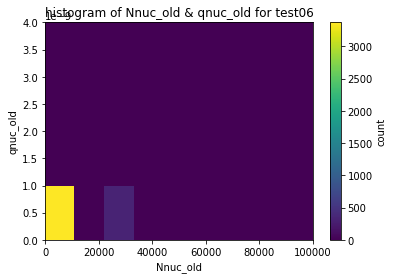

In [150]:
_,_,_,cs = plt.hist2d(df.Nnuc_old, df.qnuc_old, bins=[np.linspace(0,100000,10),np.array([0,1e-9,2e-9,3e-9,4e-9])])
plt.colorbar(cs, label="count")
plt.xlabel("Nnuc_old")
plt.ylabel("qnuc_old")
plt.title("histogram of Nnuc_old & qnuc_old for {}".format(file[:-4]))
plt.savefig("plots/hist_qnuc_Nnuc_old_{}.png".format(file[:-4]))
plt.show()

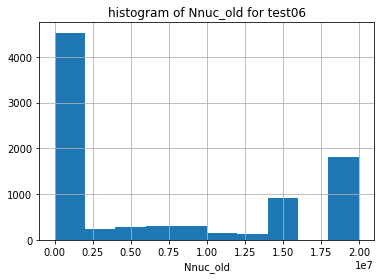

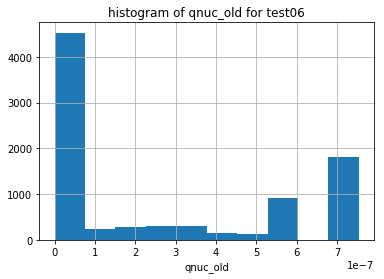

In [151]:
# plt.hist(z)
# plt.grid()
df.Nnuc_old.hist()
plt.xlabel("Nnuc_old")
plt.title("histogram of Nnuc_old for {}".format(file[:-4]))
plt.savefig("plots/hist_Nnuc_old_{}.png".format(file[:-4]))
plt.show()
df.qnuc_old.hist()
plt.xlabel("qnuc_old")
plt.title("histogram of qnuc_old for {}".format(file[:-4]))
plt.savefig("plots/hist_qnuc_old_{}.png".format(file[:-4]))
plt.show()

In [152]:
df.Nnuc_old.min(), df.Nnuc_old.max()

(0.0, 20002000.0)

In [153]:
(df.where((df["T"]>(253.15))&(df.Nnuc_old>100))["Nnuc_old"]).count()
# plt.show()

1880

/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


sliq=-0.2, mean nnuc=nan, 0.0, nnuc count=0
sliq=0.0, mean nnuc=nan, 0.0, nnuc count=0
sliq=0.2, mean nnuc=nan, 0.0, nnuc count=0
sliq=0.4, mean nnuc=nan, 0.0, nnuc count=0


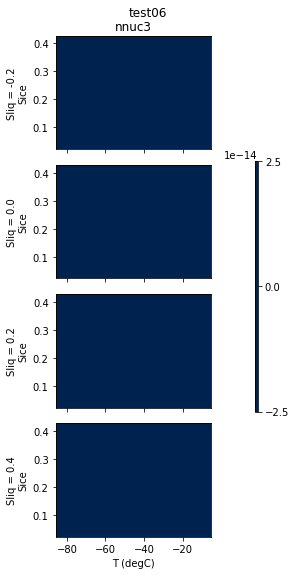

In [154]:
# single nnuc plot

# 2d histogram
var="Sliq"
svals = np.arange(-0.2,0.5,0.2)
fig, ax = plt.subplots(len(svals),1,figsize=(4,8), 
                       sharex=True, sharey=True, constrained_layout=True)
nnuc = "nnuc3"

for j in range(len(svals)):
    mask = np.where((df[var]<svals[j]+0.05)&(df[var]>=svals[j]-0.05),True, False)
    x = df["T"].values[mask]
    y = df["Sice"].values[mask]
    z = df[nnuc].values[mask]
    print("sliq={:.1f}, mean nnuc={}, {}, nnuc count={}".format(svals[j], 
                                                  np.nanmean(np.where(z>0, z, np.nan)), 
                                                  np.nanmean(z),
                                                  np.nansum(np.where(z>0,1,0))))
    meds, xedges, yedges, _ = stats.binned_statistic_2d(x,y,z, 
                              statistic="mean", bins=[18,10])

    xbins=(xedges[1:]+xedges[:-1])/2
    ybins=(yedges[1:]+yedges[:-1])/2
    pc = ax[j].contourf(xbins-273.15, ybins, meds.T, vmin=0, vmax=2e8,
                          # levels=np.logspace(0,8,25), locator=ticker.LogLocator(), 
                          cmap="cividis")

    ax[j].set_ylabel("Sice")
    ax[j].set_ylabel("Sliq = {:.1f}\nSice".format(svals[j]))
ax[-1].set_xlabel("T (degC)")
ax[0].set_title(nnuc)
fig.colorbar(pc, ax=ax[:], shrink=0.5)
fig.suptitle(file[:-4])
plt.savefig("plots/T_Sice_by_Sliq_{}_{}.png".format(file[:-4],nnuc),dpi=120)
plt.show()